<a href="https://colab.research.google.com/github/Degananda264/Air-Passengers-predicting-using-LSTM/blob/master/Air_Passengers_predicting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv("/content/AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.shape

(144, 2)

In [5]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

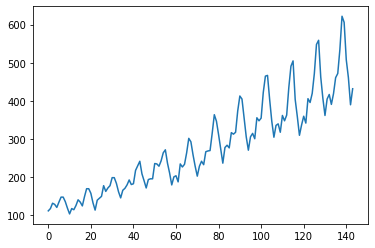

In [6]:
plt.plot(df['#Passengers'])

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_df=scaler.fit_transform(df.iloc[:,1:])

In [9]:
scaled_df.shape

(144, 1)

In [0]:
train_df_size=int(len(df)*0.65)

In [11]:
train_df_size

93

In [0]:
test_df_size=len(df)-train_df_size

In [13]:
test_df_size

51

In [0]:
train_data,test_data=scaled_df[0:train_df_size,:],scaled_df[train_df_size:len(df),:1]

In [15]:
train_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [0]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [60]:

X_train.shape, y_train.shape

((72, 20), (72,))

In [0]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 20, 1)
X_test = X_test.reshape(X_test.shape[0], 20, 1)

In [0]:

### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [64]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
72/72 [==============================] - 1s 20ms/step - loss: 0.0090 - val_loss: 0.0347
Epoch 2/100
72/72 [==============================] - 1s 10ms/step - loss: 0.0054 - val_loss: 0.0708
Epoch 3/100
72/72 [==============================] - 1s 10ms/step - loss: 0.0048 - val_loss: 0.0260
Epoch 4/100
72/72 [==============================] - 1s 10ms/step - loss: 0.0053 - val_loss: 0.0222
Epoch 5/100
72/72 [==============================] - 1s 10ms/step - loss: 0.0061 - val_loss: 0.0423
Epoch 6/100
72/72 [==============================] - 1s 10ms/step - loss: 0.0074 - val_loss: 0.0333
Epoch 7/100
72/72 [==============================] - 1s 10ms/step - loss: 0.0046 - val_loss: 0.0198
Epoch 8/100
72/72 [==============================] - 1s 10ms/step - loss: 0.0033 - val_loss: 0.0703
Epoch 9/100
72/72 [==============================] - 1s 10ms/step - loss: 0.0023 - val_loss: 0.0611
Epoch 10/100
72/72 [==============================] - 1s 10ms/step - loss: 0.0032 - val_loss: 0.0139

In [0]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [0]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [67]:
y_train.shape,train_predict.shape,train_predict

((72,), (72, 1), array([[154.10835],
        [139.19093],
        [128.40308],
        [128.2037 ],
        [138.99559],
        [150.06963],
        [157.12564],
        [164.06473],
        [169.23103],
        [177.61522],
        [187.70532],
        [192.13846],
        [180.8891 ],
        [163.29137],
        [157.33417],
        [160.6784 ],
        [170.28453],
        [178.29616],
        [183.10173],
        [188.92067],
        [195.5247 ],
        [204.75386],
        [220.63776],
        [224.25734],
        [214.86461],
        [189.01332],
        [175.33356],
        [175.86096],
        [187.76369],
        [197.6355 ],
        [203.36243],
        [214.67311],
        [231.66528],
        [250.10567],
        [264.12802],
        [261.64966],
        [244.48041],
        [216.7086 ],
        [204.21948],
        [203.46352],
        [212.03983],
        [217.68289],
        [216.30557],
        [224.50734],
        [242.26395],
        [268.86523],
        [298.73032

In [68]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

236.95413139552485

In [69]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

463.8255802413074

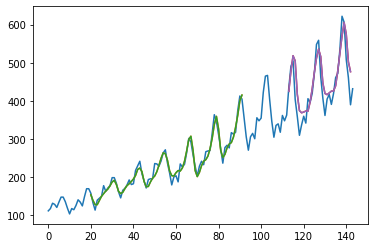

In [71]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(scaled_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
len(test_data)

51

In [73]:

x_input=test_data[31:].reshape(1,-1)
x_input.shape

(1, 20)

In [0]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [75]:

temp_input

[0.61003861003861,
 0.7104247104247104,
 0.8571428571428572,
 0.8783783783783783,
 0.693050193050193,
 0.5849420849420849,
 0.4980694980694981,
 0.581081081081081,
 0.6042471042471043,
 0.5540540540540541,
 0.6081081081081081,
 0.6891891891891891,
 0.7104247104247104,
 0.832046332046332,
 1.0,
 0.9691119691119692,
 0.7799227799227799,
 0.6891891891891891,
 0.5521235521235521,
 0.6332046332046332]

In [78]:
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<20):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.60810811 0.68918919 0.71042471 0.83204633 1.         0.96911197
 0.77992278 0.68918919 0.55212355 0.63320463 0.69098169 0.7010051
 0.72337908 0.76697892 0.8372165  0.9160825  0.970662   0.97331685
 0.93566215 0.88980174]
0 day output [[0.86137074]]
1 day input [0.68918919 0.71042471 0.83204633 1.         0.96911197 0.77992278
 0.68918919 0.55212355 0.63320463 0.69098169 0.7010051  0.72337908
 0.76697892 0.8372165  0.9160825  0.970662   0.97331685 0.93566215
 0.88980174 0.86137074]
1 day output [[0.8532332]]
2 day input [0.71042471 0.83204633 1.         0.96911197 0.77992278 0.68918919
 0.55212355 0.63320463 0.69098169 0.7010051  0.72337908 0.76697892
 0.8372165  0.9160825  0.970662   0.97331685 0.93566215 0.88980174
 0.86137074 0.85323322]
2 day output [[0.85451305]]
3 day input [0.83204633 1.         0.96911197 0.77992278 0.68918919 0.55212355
 0.63320463 0.69098169 0.7010051  0.72337908 0.76697892 0.8372165
 0.9160825  0.970662   0.97331685 0.93566215 0.88980174 0.8613

In [0]:
day_new=np.arange(1,145)
day_pred=np.arange(145,165)

In [82]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144])

In [83]:
len(scaled_df[0:])


144

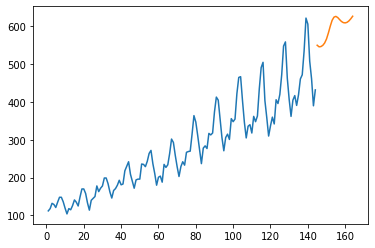

In [84]:

plt.plot(day_new,scaler.inverse_transform(scaled_df[0:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))